# How do you evaluate the Price for a second hand car?

You look at the number of years, the type of fuel, how many KMS it has run etc.

In this project, your task is to create a machine learning model which can predict the Price of a car based on its specs.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('CarPricesData.csv')


In [4]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

# Data description
The business meaning of each column in the data is as below. This is present as
an excel file named Data Dictionary / Business Dictionary

* <b>Price</b>: The Price of the car in dollars
* <b>Age</b>: The age of the car in months
* <b>KM</b>: How many KMS did the car was used
* <b>FuelType</b>: Petrol/Diesel/CNG car
* <b>HP</b>: Horse power of the car
* <b>MetColor</b>: Whether car has metallic color or not
* <b>Automatic</b>: Whether car has automatic transmission or not
* <b>CC</b>: The engine size of the car
* <b>Doors</b>: The number of doors in the car
* <b>Weight</b>: The weight of the car

In [5]:
print('No. of duplicate',df.shape)
df=df.drop_duplicates()
print('No. of duplicate after cleaning',df.shape)

No. of duplicate (1436, 10)
No. of duplicate after cleaning (1435, 10)


# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<Axes: >

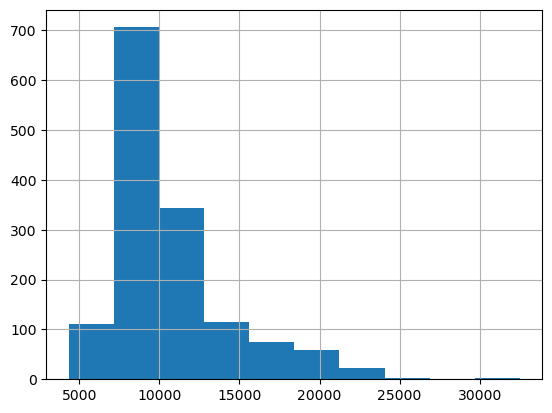

In [6]:
df['Price'].hist()

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Price of the computer?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [7]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [8]:
df.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [10]:
df.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Price</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>Age</b>: Continuous. Selected.
* <b>KM</b>: Continuous. Selected.
* <b>FuelType</b>: Categorical. Selected.
* <b>HP</b>: Categorical. Selected.
* <b>MetColor</b>: Categorical. Selected.
* <b>Automatic</b>: Categorical. Selected.
* <b>CC</b>: Categorical. Selected.
* <b>Doors</b>: Categorical. Selected.
* <b>Weight</b>: Continuous. Selected.

# Plotting histograms of Continuous columns together

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

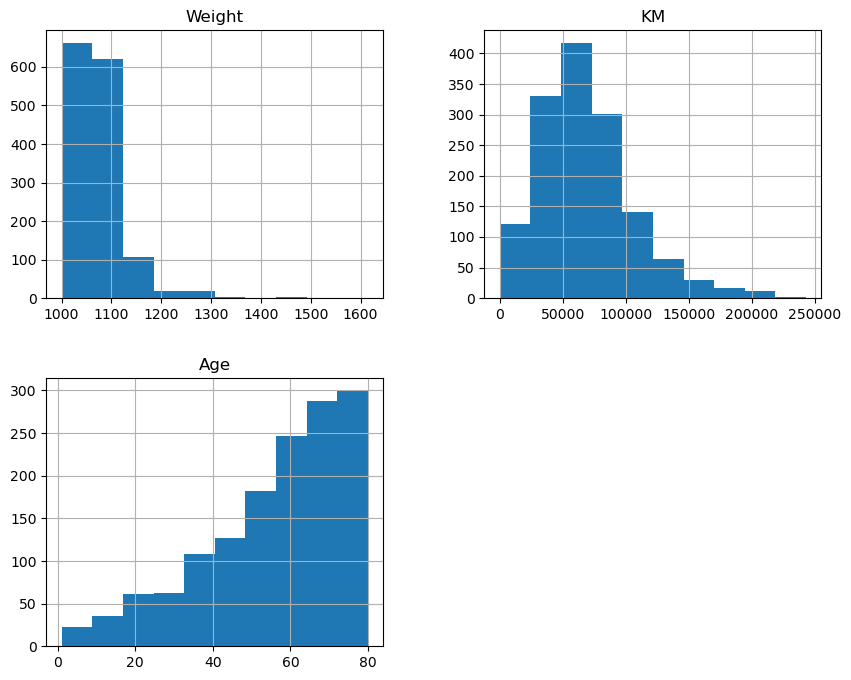

In [11]:
ContinousData=['Weight','KM','Age']
df.hist(ContinousData, figsize=(10,8))

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

In [12]:
df['Weight'][df['Weight']<1400].sort_values(ascending= False)


112     1320.0
138     1320.0
115     1280.0
119     1275.0
68      1275.0
         ...  
927     1000.0
1410    1000.0
605     1000.0
1021    1000.0
957     1000.0
Name: Weight, Length: 1428, dtype: float64

In [13]:
df['Price'][df['Price']<29000].sort_values(ascending=False)

115     24990
112     24950
147     24500
141     23950
171     23750
        ...  
402      5150
192      4750
393      4450
1048     4400
191      4350
Name: Price, Length: 1432, dtype: int64

In [14]:
df['Weight'][df['Weight']>1400]=1320

In [15]:
df['Price'][df['Price']>29000]=24990

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

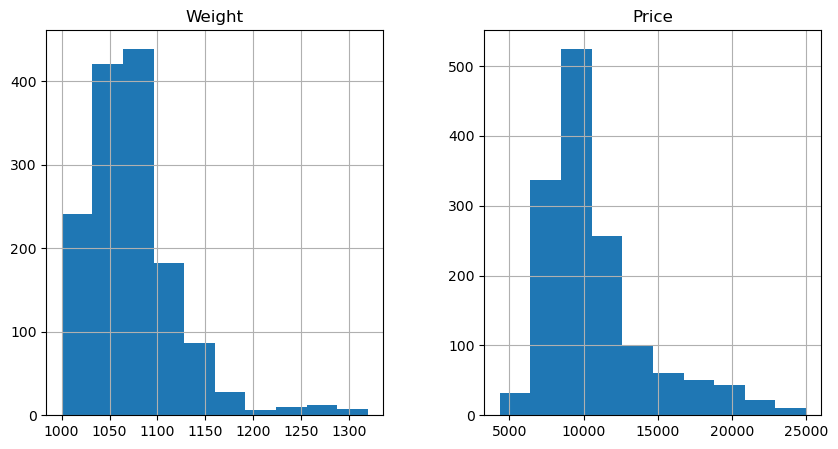

In [16]:
df.hist(['Weight','Price'],figsize=(10,5))

# Bar Charts for Catagorical Data

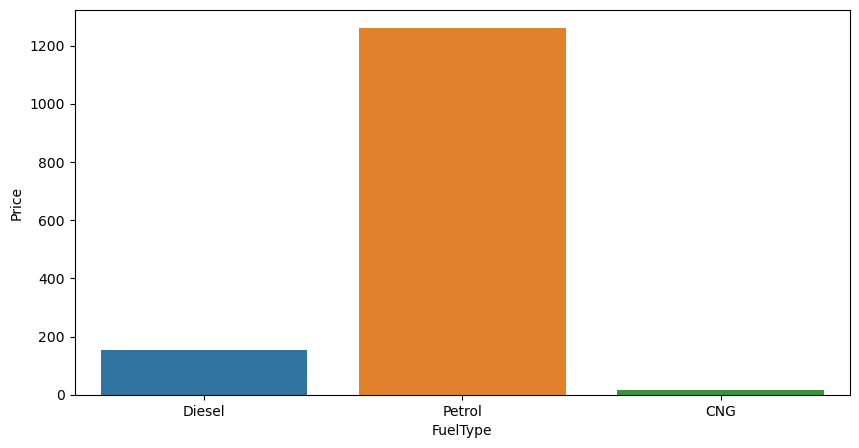

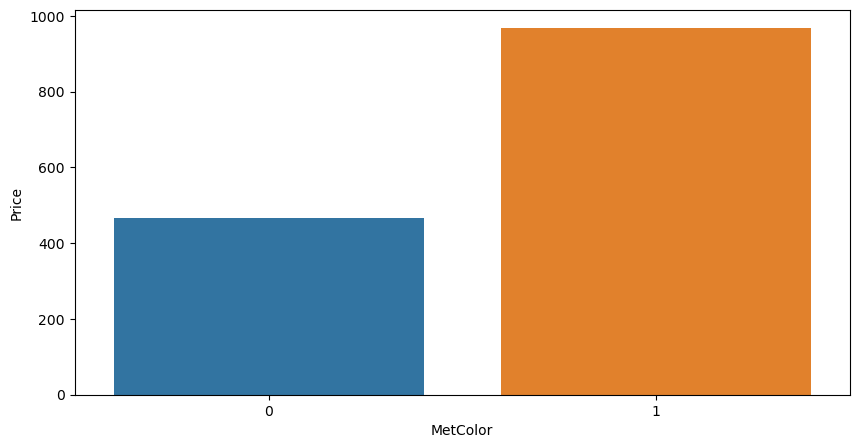

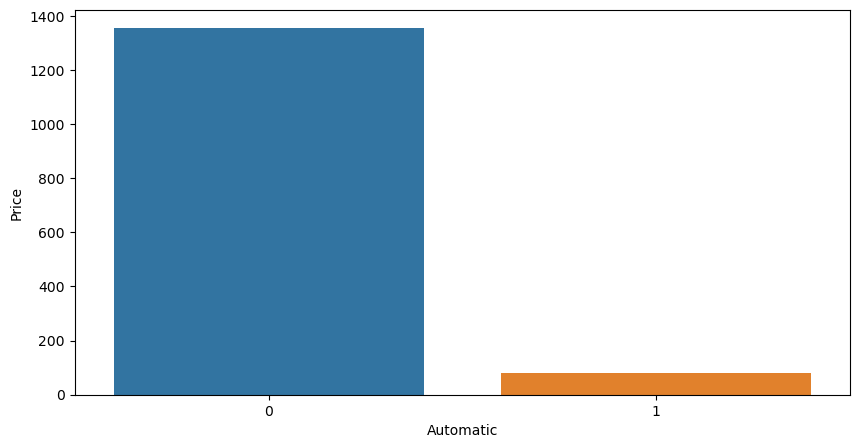

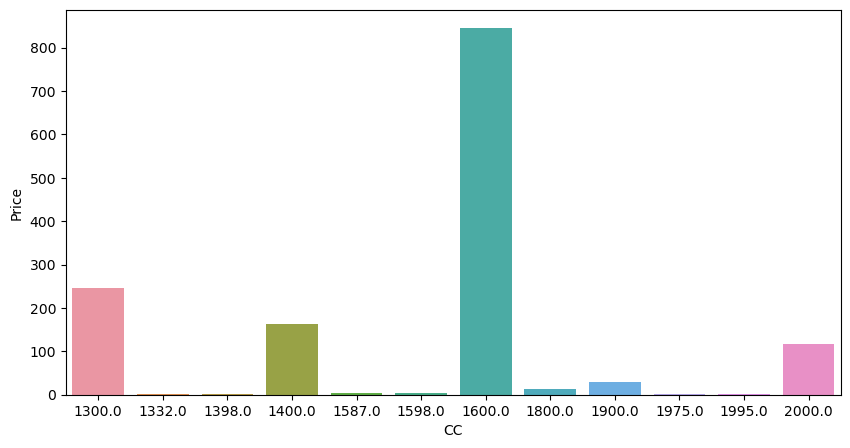

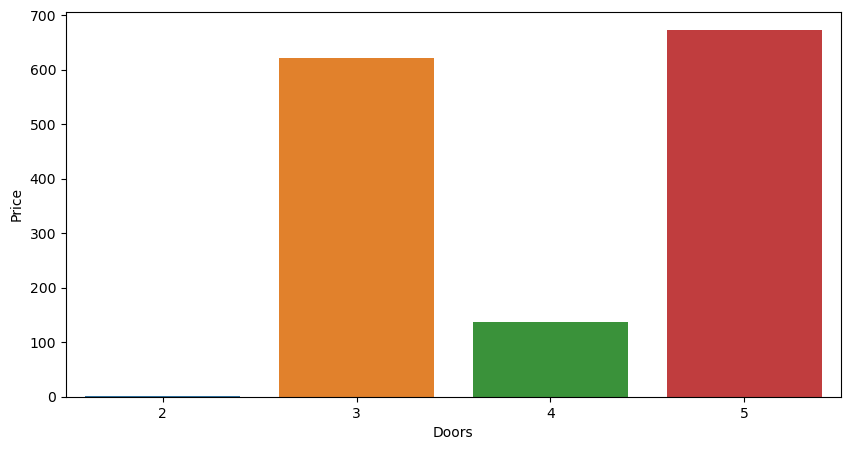

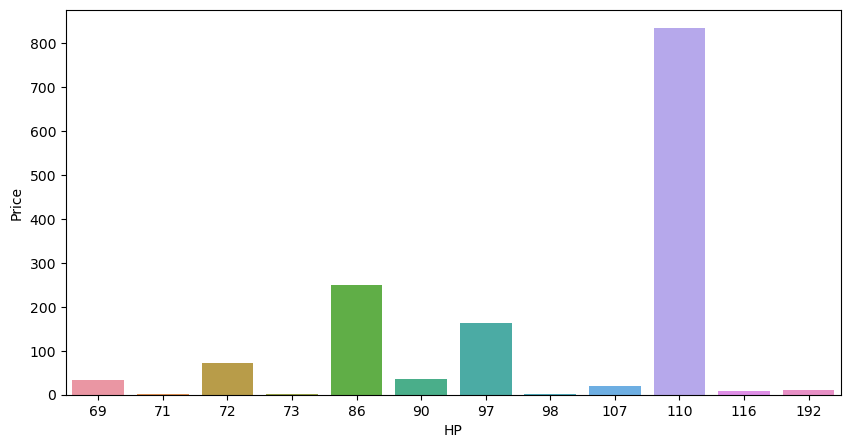

In [17]:
CatagoricalData=['FuelType','MetColor','Automatic','CC','Doors','HP']

for col in CatagoricalData:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df,x=col,y='Price',estimator='size')
    plt.show()

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64


<Axes: >

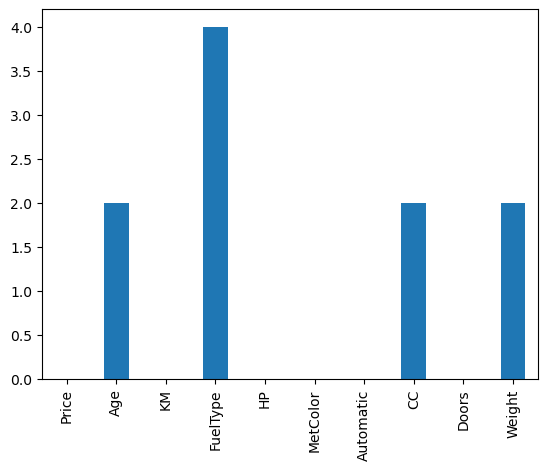

In [18]:
print(df.isnull().sum())
df.isnull().sum().plot(kind='bar')

In [19]:
df['Age'].fillna(value=df['Age'].median(),inplace=True)
df['FuelType'].fillna(value=df['FuelType'].mode()[0],inplace =True)
df['CC'].fillna(value=df['CC'].mode()[0],inplace =True)
df['Weight'].fillna(value=df['Weight'].median(),inplace=True)

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


<Axes: >

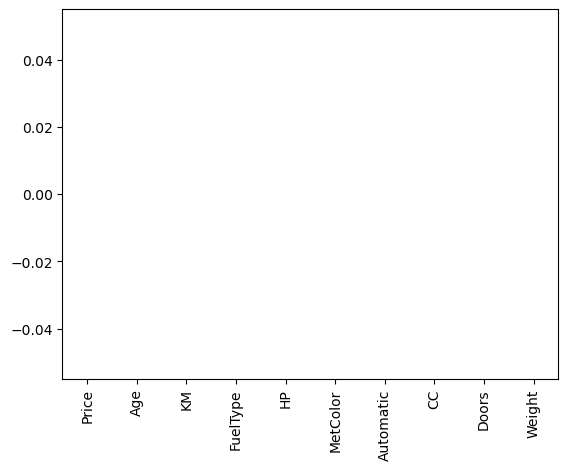

In [20]:
print(df.isnull().sum())
df.isnull().sum().plot(kind='bar')

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

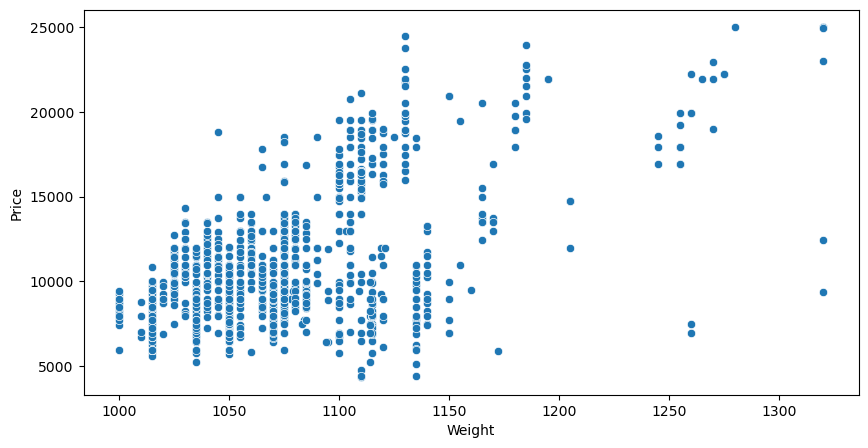

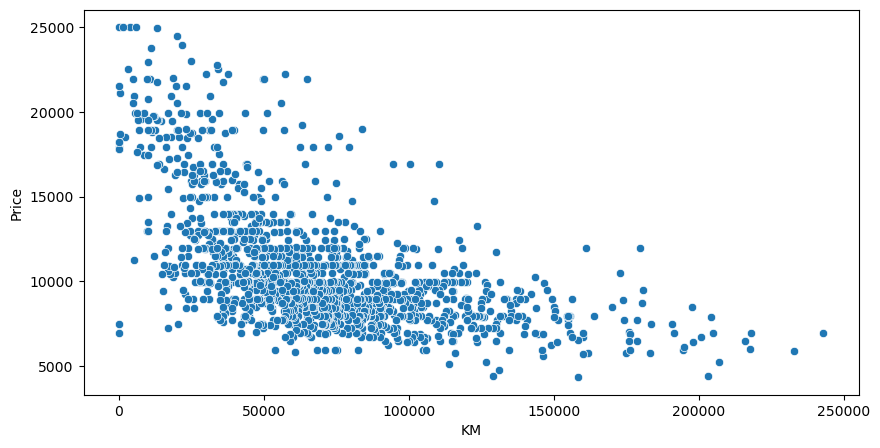

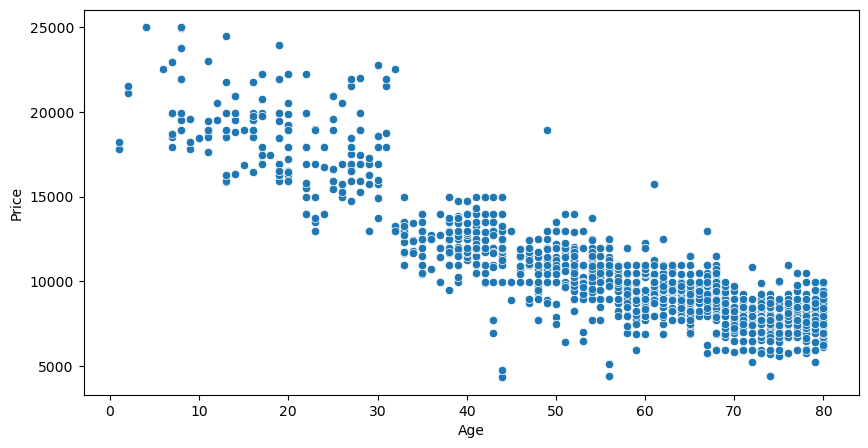

In [21]:
ContinousData_s=['Weight','KM','Age',]
for col in ContinousData_s:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df,x=col,y='Price')
    plt.show()

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator): 

In [22]:
ContinousData=['Weight','KM','Age','Price']
corr=df[ContinousData].corr()
corr


,Weight,KM,Age,Price
Weight,1.000000,-0.013607,-0.488324,0.580007
KM,-0.013607,1.000000,0.502604,-0.573402
Age,-0.488324,0.502604,1.000000,-0.880043
Price,0.580007,-0.573402,-0.880043,1.000000


In [23]:
corr['Price'][abs(corr['Price'])>0.5]

Weight    0.580007
KM       -0.573402
Age      -0.880043
Price     1.000000
Name: Price, dtype: float64

# Final selected Continuous columns:

'Age','KM','Weight'

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

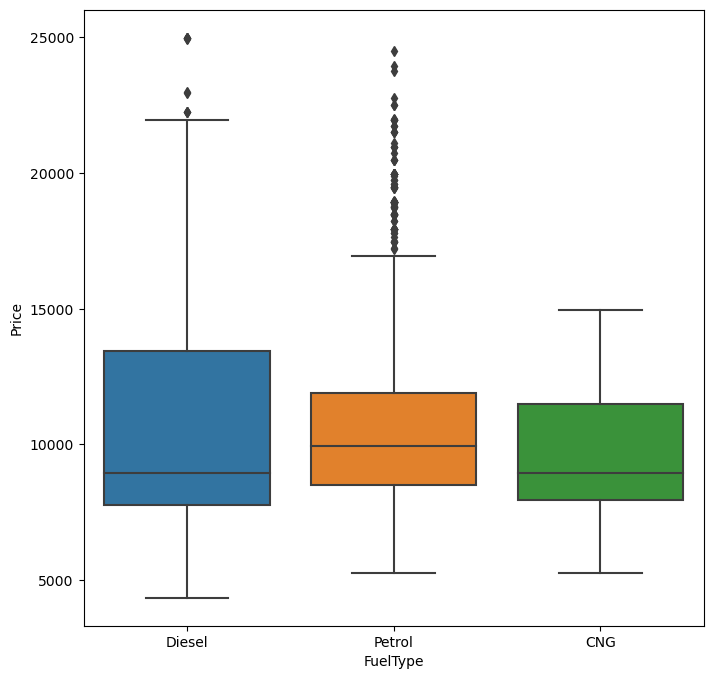

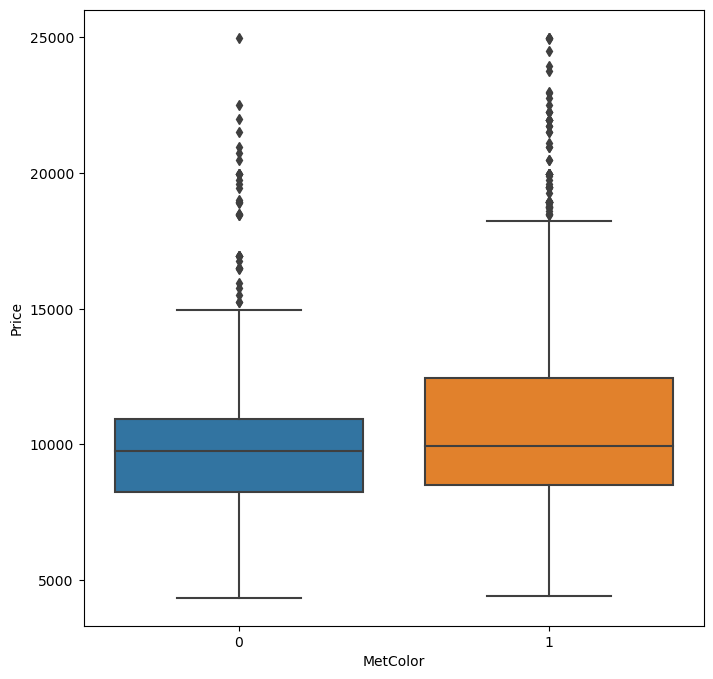

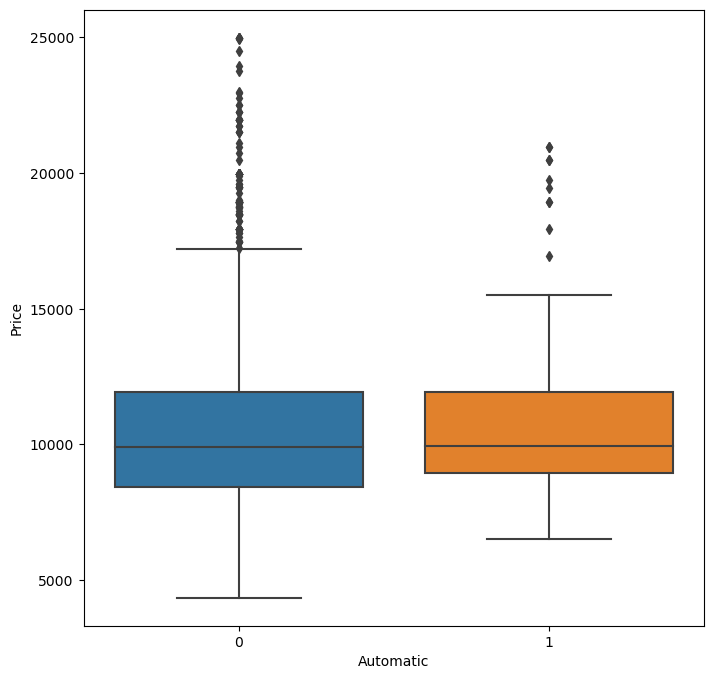

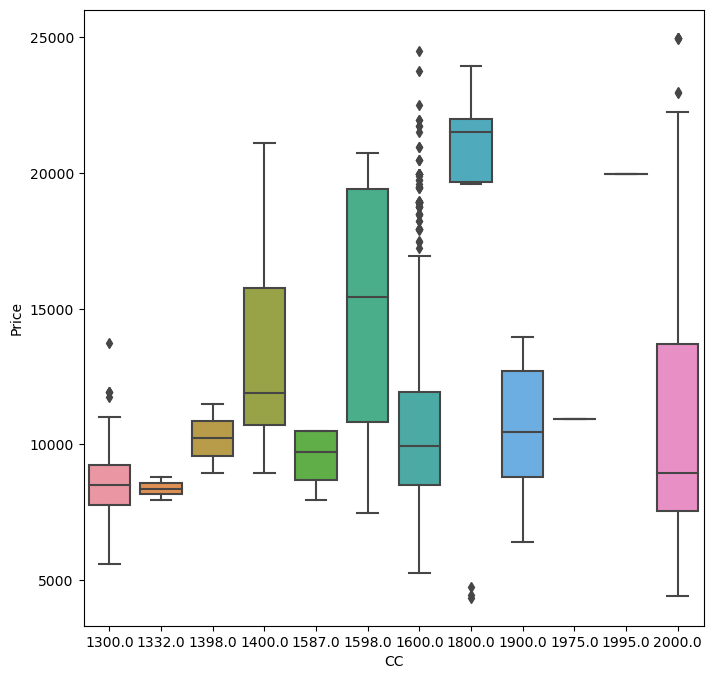

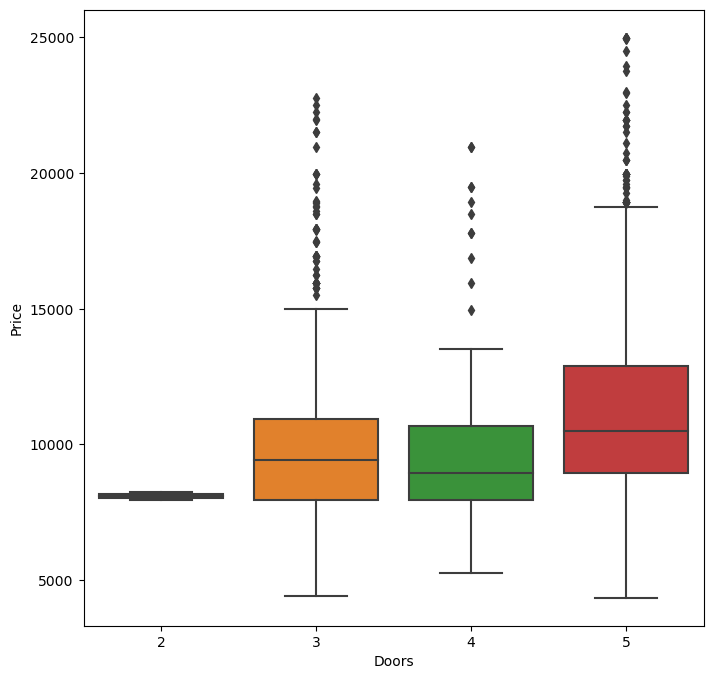

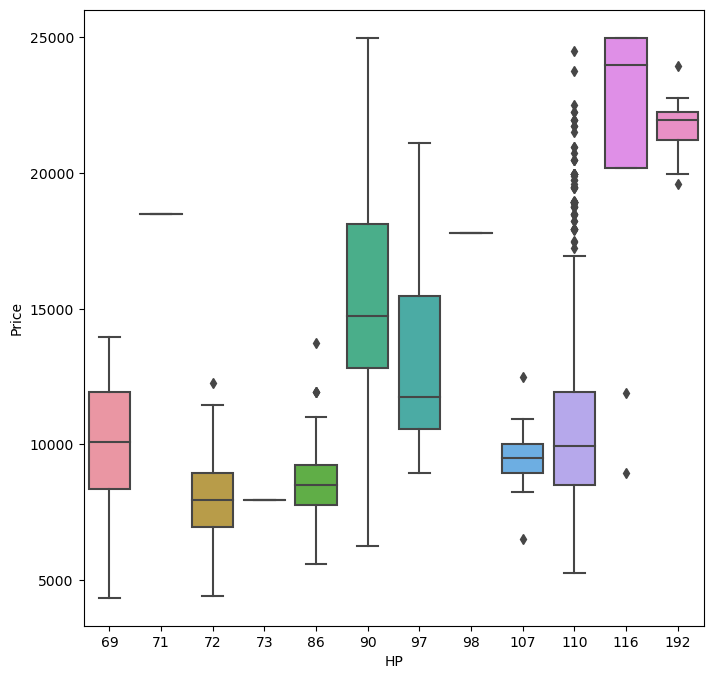

In [24]:
for col in CatagoricalData:
    plt.figure(figsize=(8,8))
    sns.boxplot(data=df,x=col,y='Price')
    plt.show()

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [25]:
from scipy.stats import f_oneway
seletionlist=[]

for col in CatagoricalData:
    anovalist=df.groupby(col)['Price'].apply(list)
    anovaresult= f_oneway(*anovalist)
    if (anovaresult[1] < 0.05):
        print(col,'is corrlated |p-value: ',anovaresult[1])
        seletionlist.append(col)
    else:
        print(col,'is not corrlated |p-value": ',anovaresult[1])
print(seletionlist) 

FuelType is not corrlated |p-value":  0.13509668858708382
MetColor is corrlated |p-value:  2.9082820205816128e-05
Automatic is not corrlated |p-value":  0.17860614078485976
CC is corrlated |p-value:  4.667580175740994e-49
Doors is corrlated |p-value:  1.0200265373934503e-12
HP is corrlated |p-value:  1.9274014078136855e-103
['MetColor', 'CC', 'Doors', 'HP']


# The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "FuelType" and "Automatic". This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'HP', 'MetColor', 'CC', 'Doors'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [26]:
final_cols=['Weight','KM','Age','MetColor', 'CC', 'Doors','HP','Price']
data_ml=df[final_cols]
data_ml.head()

,Weight,KM,Age,MetColor,CC,Doors,HP,Price
0,1165.0,46986,23.0,1,2000.0,3,90,13500
1,1165.0,72937,23.0,1,2000.0,3,90,13750
2,1165.0,41711,24.0,1,2000.0,3,90,13950
3,1165.0,48000,26.0,0,2000.0,3,90,14950
4,1170.0,38500,30.0,0,2000.0,3,90,13750


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [27]:
predictor=['Weight','KM','Age','MetColor', 'CC', 'Doors','HP']
target='Price'
X=data_ml[predictor].values
y=data_ml[[target]].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=37)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1004, 7)
(431, 7)
(1004, 1)
(431, 1)


# Multiple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model= LinearRegression()
LR=model.fit(X_train,y_train)
y_LR=LR.predict(X_train)
print('R2 score: ',metrics.r2_score(y_train,y_LR))

R2 score:  0.8724571236122012


In [29]:
# prediction table
y_LR=LR.predict(X_test)
testdata=pd.DataFrame(data=X_test,columns=predictor)
testdata[target]=y_test
testdata['prediction']=np.round(y_LR)
testdata['APE%']=round(100*((abs(testdata['Price']-testdata['prediction'])/testdata['Price'])),2)
MAPE=np.mean(testdata['APE%'])
MedianAPE=np.median(testdata['APE%'])
Accuracy =100 - MAPE
M_Accuracy=100- MedianAPE
print('The mean accuracy of the model: ',Accuracy)
print('The medium accuracy of the model: ',M_Accuracy)
testdata.head()

The mean accuracy of the model:  90.31290023201856
The medium accuracy of the model:  91.6


,Weight,KM,Age,MetColor,CC,Doors,HP,Price,prediction,APE%
0,1025.0,43700.0,56.0,1.0,1300.0,3.0,86.0,10750,10088.0,6.16
1,1090.0,93296.0,68.0,1.0,1600.0,5.0,110.0,9900,9484.0,4.20
2,1115.0,57037.0,13.0,0.0,1600.0,5.0,110.0,18950,17266.0,8.89
3,1075.0,69000.0,78.0,1.0,1600.0,5.0,110.0,9250,8302.0,10.25
4,1075.0,25000.0,58.0,1.0,1600.0,5.0,110.0,10500,11415.0,8.71


In [30]:
# final accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(model,X,y,cv=10,scoring=custom_Scoring)
print('cross val score',accuracy)
print('Final accuracy of the model: ',round(accuracy.mean(),2))

cross val score [90.44409532 89.56365325 88.73647401 92.02171842 89.47108843 91.81973698
 91.20551266 87.79318959 90.62790478 88.577706  ]
Final accuracy of the model:  90.03


# Decision Trees

In [31]:
from sklearn.tree  import DecisionTreeRegressor
from sklearn import metrics
model=DecisionTreeRegressor(max_depth=3, criterion='friedman_mse')
DTR=model.fit(X_train,y_train)
y_DTR=DTR.predict(X_train)
# goodness of fit
print("r2 value:",metrics.r2_score(y_train,y_DTR))

r2 value: 0.8630315633224335


In [125]:
# prediction table
y_DTR=DTR.predict(X_test)
testdata=pd.DataFrame(data=X_test,columns=predictor)
testdata[target]=y_test
testdata['prediction']=np.round(y_DTR)
testdata['APE%']=round(100*((abs(testdata['Price']-testdata['prediction'])/testdata['Price'])),2)
MAPE=np.mean(testdata['APE%'])
MedianAPE=np.median(testdata['APE%'])
Accuracy =100 - MAPE
M_Accuracy=100- MedianAPE
print('The mean accuracy of the model: ',Accuracy)
print('The medium accuracy of the model: ',M_Accuracy)
testdata.head()

The mean accuracy of the model:  89.24726218097447
The medium accuracy of the model:  91.82


,Weight,KM,Age,MetColor,CC,Doors,HP,Price,prediction,APE%
0,1025.0,43700.0,56.0,1.0,1300.0,3.0,86.0,10750,9430.0,12.28
1,1090.0,93296.0,68.0,1.0,1600.0,5.0,110.0,9900,9430.0,4.75
2,1115.0,57037.0,13.0,0.0,1600.0,5.0,110.0,18950,18123.0,4.36
3,1075.0,69000.0,78.0,1.0,1600.0,5.0,110.0,9250,7938.0,14.18
4,1075.0,25000.0,58.0,1.0,1600.0,5.0,110.0,10500,9430.0,10.19


In [126]:
# final accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(model,X,y,cv=10,scoring=custom_Scoring)
print('cross val score',accuracy)
print('Final accuracy of the model: ',round(accuracy.mean(),2))

cross val score [78.89975961 75.80830841 83.30316675 85.78200882 83.34549908 90.61206477
 91.78645028 81.31311533 91.26690628 89.39986216]
Final accuracy of the model:  85.15


# Random Forest

In [127]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn import metrics
model=RandomForestRegressor(max_depth=3, criterion='friedman_mse',n_estimators=100)
RFR=model.fit(X_train,y_train)
y_RFR=RFR.predict(X_train)
# goodness of fit
print("r2 value:",metrics.r2_score(y_train,y_RFR))

r2 value: 0.8799391684208613


In [128]:
# prediction table
y_RFR=RFR.predict(X_test)
testdata=pd.DataFrame(data=X_test,columns=predictor)
testdata[target]=y_test
testdata['prediction']=np.round(y_RFR)
testdata['APE%']=round(100*((abs(testdata['Price']-testdata['prediction'])/testdata['Price'])),2)
MAPE=np.mean(testdata['APE%'])
MedianAPE=np.median(testdata['APE%'])
Accuracy =100 - MAPE
M_Accuracy=100- MedianAPE
print('The mean accuracy of the model: ',Accuracy)
print('The medium accuracy of the model: ',M_Accuracy)
testdata.head()

The mean accuracy of the model:  89.78408352668214
The medium accuracy of the model:  92.37


,Weight,KM,Age,MetColor,CC,Doors,HP,Price,prediction,APE%
0,1025.0,43700.0,56.0,1.0,1300.0,3.0,86.0,10750,9934.0,7.59
1,1090.0,93296.0,68.0,1.0,1600.0,5.0,110.0,9900,9418.0,4.87
2,1115.0,57037.0,13.0,0.0,1600.0,5.0,110.0,18950,17311.0,8.65
3,1075.0,69000.0,78.0,1.0,1600.0,5.0,110.0,9250,7935.0,14.22
4,1075.0,25000.0,58.0,1.0,1600.0,5.0,110.0,10500,9442.0,10.08


In [129]:
# final accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(model,X,y,cv=10,scoring=custom_Scoring)
print('cross val score',accuracy)
print('Final accuracy of the model: ',round(accuracy.mean(),2))

cross val score [77.48359894 75.27674388 83.6773652  88.07977809 84.48735986 90.6336656
 91.81992149 81.22687021 91.2700645  89.40839011]
Final accuracy of the model:  85.34


# Taking Linear Regression as the best model with Accuracy 90.03